# Homework 4

## Your Name Here (or your names here if you are pair programming)

#### * Erika Noda (edn427)
#### * Name

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

C:\Users\erika\AppData\Local\Temp\ipykernel_32556\572230382.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [18]:
# 1. Add column headers
col_names = ['taxiID', 'driverID', 'pickup_time', 'dropoff_time', 'trip_seconds', 'trip_miles', 'pickup_long', 'pickup_lat', 'dropoff_long', 'dropoff_lat', 'payment_type', 'trip_cost', 'surcharge', 'tax', 'tip', 'toll', 'total']
df = pd.read_csv('nyc-taxi-data.csv.bz2', names=col_names)
print(df.shape)
df

(50000, 17)


,taxiID,driverID,pickup_time,dropoff_time,trip_seconds,trip_miles,pickup_long,pickup_lat,dropoff_long,dropoff_lat,payment_type,trip_cost,surcharge,tax,tip,toll,total
0,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.5,0.5,0.5,0.00,0.0,4.50
1,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
2,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
4,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [20]:
# 2. Drop rows with trip distance < 1 and total fare > 20
df = df[(df['trip_miles'] >= 1) & (df['total'] <= 20)]
df

,taxiID,driverID,pickup_time,dropoff_time,trip_seconds,trip_miles,pickup_long,pickup_lat,dropoff_long,dropoff_lat,payment_type,trip_cost,surcharge,tax,tip,toll,total
8,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
9,5F78CC6D4ECD0541B765FECE17075B6F,B7567F5BFD558C665D23B18451FE1FD1,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.21,-73.973000,40.793140,-73.981453,40.778465,CRD,6.0,0.5,0.5,1.30,0.0,8.30
18,655E773C92FA446353D5C8B7416BE818,B6EAE07E2AD023B387EE5F09BB2D89E3,2013-01-01 00:02:00,2013-01-01 00:05:00,180,1.55,-74.003197,40.733032,-74.012985,40.717377,CRD,6.0,0.5,0.5,1.62,0.0,8.62
28,D9598D121715B456C101D5CF72DEF513,34887B903219BC5FE57B3A860DB74C1F,2013-01-01 00:01:00,2013-01-01 00:06:00,300,1.04,-73.981918,40.771168,-73.969978,40.767078,CSH,6.0,0.5,0.5,0.00,0.0,7.00
31,4707DD250F4F2269CF31DA87314A35DE,4E0CF2EFC2B6F83FB8CDC8B49023970A,2013-01-01 00:00:00,2013-01-01 00:07:00,420,1.22,-73.996132,40.739567,-74.004288,40.750999,CRD,7.0,0.5,0.5,2.00,0.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,9F8C0E2FD73112A4F8D747200CD5FF8E,7DE181DCBE506D2278E37DD6F7FB060B,2013-01-01 03:41:00,2013-01-01 03:46:00,300,2.20,-73.982407,40.731586,-73.963921,40.756981,CRD,8.0,0.5,0.5,2.12,0.0,11.12
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [21]:
# Check the shape of the df
print(df.shape)

# Check if there is any missing data
print(df.isnull().sum())

(31407, 17)
taxiID          0
driverID        0
pickup_time     0
dropoff_time    0
trip_seconds    0
trip_miles      0
pickup_long     0
pickup_lat      0
dropoff_long    0
dropoff_lat     0
payment_type    0
trip_cost       0
surcharge       0
tax             0
tip             0
toll            0
total           0
dtype: int64


In [22]:
# 3. Drop rows dropoff_time being earlier than pickup_time
df = df[df['dropoff_time'] > df['pickup_time']]
print(df.shape)
df


(31407, 17)


,taxiID,driverID,pickup_time,dropoff_time,trip_seconds,trip_miles,pickup_long,pickup_lat,dropoff_long,dropoff_lat,payment_type,trip_cost,surcharge,tax,tip,toll,total
8,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
9,5F78CC6D4ECD0541B765FECE17075B6F,B7567F5BFD558C665D23B18451FE1FD1,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.21,-73.973000,40.793140,-73.981453,40.778465,CRD,6.0,0.5,0.5,1.30,0.0,8.30
18,655E773C92FA446353D5C8B7416BE818,B6EAE07E2AD023B387EE5F09BB2D89E3,2013-01-01 00:02:00,2013-01-01 00:05:00,180,1.55,-74.003197,40.733032,-74.012985,40.717377,CRD,6.0,0.5,0.5,1.62,0.0,8.62
28,D9598D121715B456C101D5CF72DEF513,34887B903219BC5FE57B3A860DB74C1F,2013-01-01 00:01:00,2013-01-01 00:06:00,300,1.04,-73.981918,40.771168,-73.969978,40.767078,CSH,6.0,0.5,0.5,0.00,0.0,7.00
31,4707DD250F4F2269CF31DA87314A35DE,4E0CF2EFC2B6F83FB8CDC8B49023970A,2013-01-01 00:00:00,2013-01-01 00:07:00,420,1.22,-73.996132,40.739567,-74.004288,40.750999,CRD,7.0,0.5,0.5,2.00,0.0,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,9F8C0E2FD73112A4F8D747200CD5FF8E,7DE181DCBE506D2278E37DD6F7FB060B,2013-01-01 03:41:00,2013-01-01 03:46:00,300,2.20,-73.982407,40.731586,-73.963921,40.756981,CRD,8.0,0.5,0.5,2.12,0.0,11.12
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [25]:
# 4. calculate that the total is the sum of the trip_cost, surcharge, tax, tip, and toll; if not, drop the row
df_clean = df.copy()
df_clean['total_calc'] = df_clean['trip_cost'] + df_clean['surcharge'] + df_clean['tax'] + df_clean['tip'] + df_clean['toll']
df_clean = df_clean[df_clean['total'] == df_clean['total_calc']]
print(df_clean.shape)
df_clean.drop('total_calc', axis=1, inplace=True)
df_clean

(30881, 18)


,taxiID,driverID,pickup_time,dropoff_time,trip_seconds,trip_miles,pickup_long,pickup_lat,dropoff_long,dropoff_lat,payment_type,trip_cost,surcharge,tax,tip,toll,total
8,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
9,5F78CC6D4ECD0541B765FECE17075B6F,B7567F5BFD558C665D23B18451FE1FD1,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.21,-73.973000,40.793140,-73.981453,40.778465,CRD,6.0,0.5,0.5,1.30,0.0,8.30
28,D9598D121715B456C101D5CF72DEF513,34887B903219BC5FE57B3A860DB74C1F,2013-01-01 00:01:00,2013-01-01 00:06:00,300,1.04,-73.981918,40.771168,-73.969978,40.767078,CSH,6.0,0.5,0.5,0.00,0.0,7.00
31,4707DD250F4F2269CF31DA87314A35DE,4E0CF2EFC2B6F83FB8CDC8B49023970A,2013-01-01 00:00:00,2013-01-01 00:07:00,420,1.22,-73.996132,40.739567,-74.004288,40.750999,CRD,7.0,0.5,0.5,2.00,0.0,10.00
40,AF1C751AC62E231FF84C83B83F81229A,CD0BC69213F64536E811E8906E2BD39A,2013-01-01 00:03:00,2013-01-01 00:07:00,240,1.00,-73.970779,40.798622,-73.979286,40.786877,CRD,5.5,0.5,0.5,1.20,0.0,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,9ABB4C8F2E3AEE534DD122B9DC0EA26A,50CBCBB6E464DA752EB8244DCA4BF9B9,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.92,-73.989304,40.723156,-73.972229,40.745571,CRD,7.5,0.5,0.5,2.00,0.0,10.50
49996,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49997,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49998,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

In [28]:
# Create smaller dataframe with the columns: trip_miles, trip_seconds, and trip_cost
q2 = df_clean[['trip_miles', 'trip_seconds', 'trip_cost']]

# create correlation matrix
corr = q2.corr()
corr

,trip_miles,trip_seconds,trip_cost
trip_miles,1.000000,0.642223,0.919363
trip_seconds,0.642223,1.000000,0.873380
trip_cost,0.919363,0.873380,1.000000


array([[<Axes: xlabel='trip_miles', ylabel='trip_miles'>,
        <Axes: xlabel='trip_seconds', ylabel='trip_miles'>,
        <Axes: xlabel='trip_cost', ylabel='trip_miles'>],
       [<Axes: xlabel='trip_miles', ylabel='trip_seconds'>,
        <Axes: xlabel='trip_seconds', ylabel='trip_seconds'>,
        <Axes: xlabel='trip_cost', ylabel='trip_seconds'>],
       [<Axes: xlabel='trip_miles', ylabel='trip_cost'>,
        <Axes: xlabel='trip_seconds', ylabel='trip_cost'>,
        <Axes: xlabel='trip_cost', ylabel='trip_cost'>]], dtype=object)

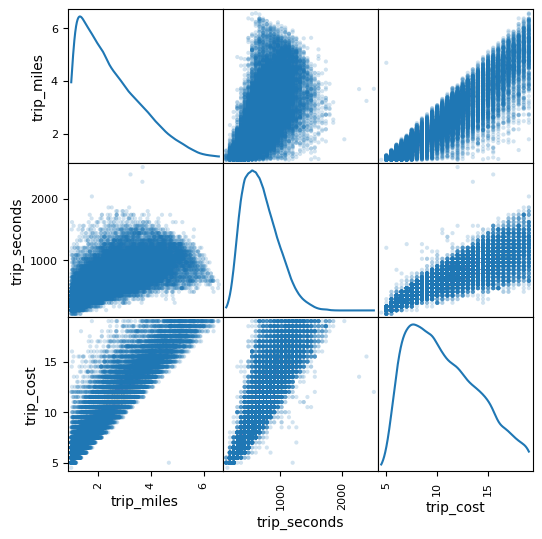

In [31]:
# create a scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(q2, alpha=0.2, figsize=(6, 6), diagonal='kde')


## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [30]:
# import libraries
import sklearn as sk

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [32]:
# import libraries
from sklearn.linear_model import LinearRegression

In [33]:
# create new df with only the columns: trip_miles and trip_seconds
q4 = df_clean[['trip_miles', 'trip_seconds']]

In [39]:
# create a Linear Regression model
x= q4['trip_miles'].values.reshape(-1, 1)
y= q4['trip_seconds'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)

print('coefficients:', reg.coef_)
print('intercept:', reg.intercept_)

coefficients: [[161.23427747]]
intercept: [280.97975111]


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

In [10]:
# Your code here